In [1]:
#This is just the path to my computer's module directory
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
import numpy

#Number of Nodes, Eges and possible Opinions in the system
NNodes = 15
NEdges = 5
NOpinions = 3

#Create Random Graph
G = nx.gnm_random_graph(NNodes, NEdges)

#Assign opinions by random to Node
for i in range(NNodes):
    G.node[i]["opinion"]= random.randint(1,NOpinions)
    

In [3]:
def process1():
#Choose random Node
    curr_node = random.randint(1,NNodes)
    print("curr_node", curr_node)

#Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    print("curr_opinion", curr_opinion)
    print("degree", G.degree(curr_node))
    
    if G.degree(curr_node)== 0:
        return
    
#Choose rnd Neighbor, assign Number between 0 and degree(curr_node)-1
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    print("chosen_neighbor", chosen_neighbor)
#Except: No Node without Neighbors!
    
#Remove Edge between Current Node and neighbor
    old_edge = (curr_node, chosen_neighbor)
    G.remove_edge(*old_edge)

#Choose rnd Node that has same opinion
    Same_Opinion= [x for x,y in G.nodes(data=True) if y['opinion']==curr_opinion]
    print("Same Opinion", Same_Opinion)
    newNeighbor = random.choice(Same_Opinion)

#Except Nodes that are already neighbors?
#Add Edge
    new_edge = (curr_node, newNeighbor)
    G.add_edge(*new_edge)
#Add edge between current Node and newNeighbor
    return

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]


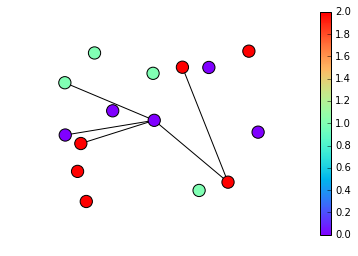

curr_node 11
curr_opinion 1
degree 4
chosen_neighbor 0
Same Opinion [5, 6, 8, 11, 13]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]


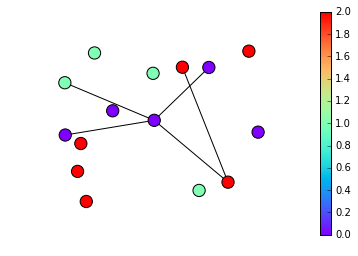

In [6]:
from itertools import count
groups = set(nx.get_node_attributes(G,'opinion').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['opinion']] for n in nodes]
pos = nx.layout.random_layout(G)
es = nx.draw_networkx_edges(G, pos, alpha=1) 
ns = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size=150, cmap=plt.cm.rainbow)

plt.colorbar(ns)
plt.axis('off')


A = nx.adjacency_matrix(G)
print(A.todense())
plt.show()
process1()
A = nx.adjacency_matrix(G)
print(A.todense())
plt.show()
es = nx.draw_networkx_edges(G, pos, alpha=1) 
ns = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size=150, cmap=plt.cm.rainbow)

plt.colorbar(ns)
plt.axis('off')
plt.show()
